In [1]:
%matplotlib inline

In [2]:
# !pip install pandas
# !pip install matplotlib
# !pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_csv('newcars.csv')

# Overview
After cleaning up our file, adding a few columns, and efficiently rearranging the rows, we've observed the key statistics of our dataset. We now comprehend the primary values and items we'll be working with. It's time to visualize straightforward aspects that are easy to comprehend.

1) I have chosen to create several line graphs that compare price and year, mileage and price, and mileage and power. Regarding the latter comparison, it may initially seem unconventional, but, as depicted below, it bears a closer resemblance to a genuine line graph with discernible dependencies, especially when juxtaposed with the other graphs. Additionally, I have opted to generate statistics specifically for Mercedes-Benz, rather than for every car, to ensure my comparisons are more pertinent and to avoid cluttering the statistics.
2) My second plot, presented in the form of a histogram, serves the purpose of visually depicting the distribution of cars across specific brands by quantifying the frequency of each brand. This graphical representation is valuable in providing a quick and intuitive understanding of the dataset's brand distribution, facilitating insights into the relative abundance or scarcity of different brands within the overall dataset.
3) The third and fourth graphs take the form of scatter plots, delineating the correlation between price and year for all cars in the dataset, with a special focus on Mercedes-Benz. These visualizations aim to provide a comprehensive understanding of how the pricing dynamics evolve over the years for both the entire dataset and the specific brand. By employing scatter plots, we gain insights into the dispersed distribution of prices relative to the manufacturing years, offering a nuanced perspective on the pricing trends within the dataset and the specific Mercedes-Benz subset.
4) Last but certainly not least, I've presented two graphs depicting the count of Mercedes-Benz vehicles on the market across various years and the distribution of vehicles based on their horsepower. These visualizations serve to elucidate the fluctuation in the availability of Mercedes-Benz cars over different years and offer insights into the prevalence of various horsepower categories within the dataset.

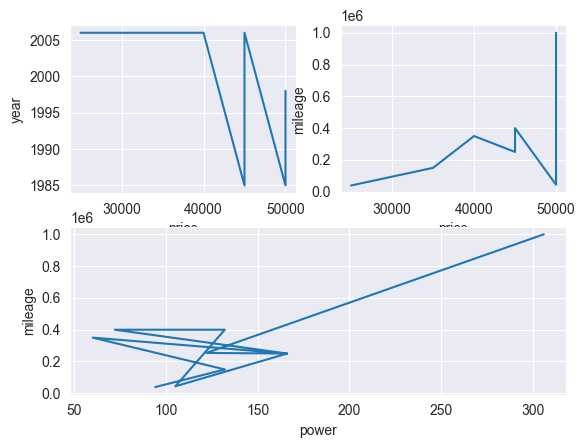

In [21]:
merc1 = data.loc[data['brand'] == 'Mercedes-Benz']
merc = merc1.sort_values(by=['price', 'year', 'mileage', 'power'], ascending=True)[:10]
plt.subplot(2, 2, 1)
plt.plot(merc['price'], merc['year'])
plt.xlabel('price')
plt.ylabel('year')
# plt.legend()
plt.subplot(2, 2, 2)
plt.xlabel('price')
plt.ylabel('mileage')
plt.plot(merc['price'], merc['mileage'])
# plt.legend()
plt.subplot(2, 1, 2)
plt.ylabel('mileage')
plt.xlabel('power')
plt.plot(merc['power'], merc['mileage'])
# plt.legend()

plt.show()

In [ ]:

px.histogram(data.year,
    marginal="box",
    nbins=50,
    barmode="overlay",
    title="The number of cars on the market by year of production")

In [ ]:
vc= data['brand'].value_counts()
piedf = pd.DataFrame(data=zip(vc.index, vc.values))

px.pie(piedf,values=1,
    names=0,
    title="The number of cars on the market by brands",
    hole=0.3).update_traces(textposition="inside", textinfo="percent+label")

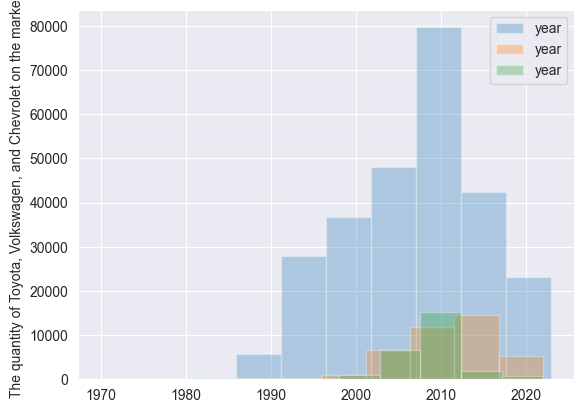

In [25]:
ax = data.loc[data.brand == 'Toyota', 'year'].plot(kind='hist', alpha=0.3)
data.loc[data.brand == 'Volkswagen', 'year'].plot(kind='hist', alpha=0.3, ax=ax)
data.loc[data.brand == 'Chevrolet', 'year'].plot(kind='hist', alpha=0.3, ax=ax)
ax.yaxis.set_label_text('The quantity of Toyota, Volkswagen, and Chevrolet on the market.')
plt.legend()
plt.show()

In [ ]:
px.scatter(data, x='year', y='price', log_y=[0.01, 3000_000_000], log_x=[0.01, 1000000])

In [ ]:
px.scatter(merc1, x='year', y='price', log_y=[0, 10_000_000])

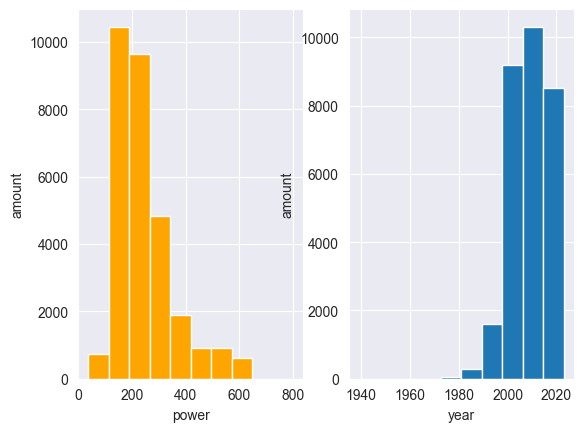

In [24]:
plt.subplot(1, 2, 1)
plt.hist(merc1['power'], color='Orange')
plt.xlabel('power')
plt.ylabel('amount')
plt.subplot(1, 2, 2)
plt.hist(merc1['year'])
plt.xlabel('year')
plt.ylabel('amount')
plt.show()

# Substantial plots for detailed overview
As we delve further into our dataset, it becomes imperative to conduct a correlation analysis—a statistical gauge delineating the magnitude and direction of linear associations between two variables. Focusing on our numeric columns (price, year, power, mileage), I intend to elucidate the interrelationships among these values and reveal latent patterns or trends. The meticulous scrutiny of correlations involving horsepower, price, mileage, and year seeks to unravel consequential associations and dependencies. This analytical endeavor promises to furnish valuable insights, illuminating how alterations in one variable may wield influence over another, thereby refining our comprehension of the nuanced dynamics inherent in our dataset.

In [20]:
y = data[['price', 'year', 'mileage', 'power']]
corr = y.corr().style.background_gradient(cmap='coolwarm')
print(corr.data)
px.imshow(data[['price', 'year', 'mileage', 'power']].corr())

            price      year   mileage     power
price    1.000000  0.400534 -0.267206  0.608761
year     0.400534  1.000000 -0.363736  0.185184
mileage -0.267206 -0.363736  1.000000 -0.045202
power    0.608761  0.185184 -0.045202  1.000000


In [ ]:

pd.plotting.scatter_matrix(pd.DataFrame(data=data, columns=['price', 'year', 'mileage', 'power']), figsize=(20, 10))
plt.show()

1. <u><b>Price vs. Year (0.400534):</u></b>
   
   The positive correlation between car price and the year of manufacture (0.40) indicates that, on average, newer cars tend to command higher prices. This could be attributed to advancements in technology, safety features, and overall improvements in newer models.

2. <u><b>Price vs. Mileage (-0.267206):</u></b>
   
   The negative correlation between car price and mileage (-0.27) suggests that, in general, lower mileage is associated with higher prices. This aligns with the common perception that cars with less wear and tear typically have higher market values.

3.  <u><b>Price vs. Power (0.608761):</u></b>
   
    The strong positive correlation (0.61) between car price and horsepower implies that there is a substantial influence of engine power on pricing. Buyers seem willing to pay more for cars with higher horsepower, reflecting a demand for performance-oriented vehicles.

4. <u><b>Year vs. Mileage (-0.363736):</u></b>

   The moderate negative correlation (-0.36) between the year of manufacture and mileage indicates that newer cars tend to have lower mileage. This inverse relationship could be attributed to the expectation that older cars are likely to have accumulated more miles over time.

5. <u><b>Year vs. Power (0.185184):</u></b>
   
   The relatively weak positive correlation (0.19) between the year of manufacture and horsepower suggests a nuanced relationship. While newer cars may, on average, have slightly higher horsepower, other factors influence the power-performance dynamic.

6. <u><b>Mileage vs. Power (-0.045202):</u></b>
   
   The very weak negative correlation (-0.05) between mileage and horsepower implies that there is no clear relationship between a car's mileage and its horsepower. This suggests that factors other than mileage contribute more significantly to a car's power.

7. <u><b>Causation Note:</u></b>
   
   Correlations show connections, but proving causation needs more evidence. External factors and missing variables might influence observed correlations.

8. <u><b>Visualizing Data:</u></b>
   
   Using plots like scatter or regression plots helps understand relationships better. Visual exploration can uncover non-linear trends or outliers not entirely captured by correlation coefficients, which is why I included plots.


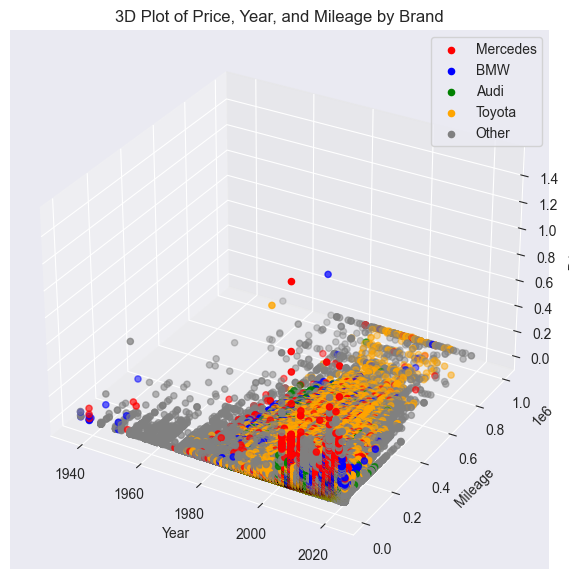

In [23]:
df = data
df['branding'] = 'Other'
df.loc[df['brand'].str.contains('Mercedes-Benz', case=False), 'branding'] = 'Mercedes'
df.loc[df['brand'].str.contains('BMW', case=False), 'branding'] = 'BMW'
df.loc[df['brand'].str.contains('Audi', case=False), 'branding'] = 'Audi'
df.loc[df['brand'].str.contains('Toyota', case=False), 'branding'] = 'Toyota'
fig = plt.figure(figsize=(100, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['year']
y = df['mileage']
z = df['price']

colors = {'Mercedes': 'red', 'BMW': 'blue', 'Audi': 'green', 'Toyota': 'orange', 'Other': 'gray'}
df['Color'] = df['branding'].map(colors)

ax.scatter(x, y, z, c=df['Color'], marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('Mileage')
ax.set_zlabel('Price')
ax.set_title('3D Plot of Price, Year, and Mileage by Brand')

for brand, color in colors.items():
    ax.scatter([], [], [], c=color, label=brand)

ax.legend()

plt.show()


The 3D plot illustrates relationships between the year of manufacture, mileage, and price for Mercedes, Toyota, BMW, Audi, and other cars. Key observations include:

- Year vs. Price:
Newer cars generally have higher prices, with distinct trends for each brand. Looking at our data, we can notice some interesting things. Mercedes-Benz has many new cars, and they tend to be pricier than Toyotas. There are also quite a few Toyotas with high mileage. In the BMW category, most cars are priced lower than Mercedes, except for those that's more expensive than the most Audi cars.
- Mileage vs. Price:
Significant mileage variation exists, with identifiable clusters for each brand.
- Brand Differentiation:
Color-coded points distinguish brands, highlighting unique pricing and mileage trends.
- Insights for Further Analysis:
Questions arise about factors influencing pricing, encouraging deeper exploration.

In [18]:
data.to_csv('newestcars.csv')